# **Big Data Project 2**

#### Chaya Chandana Doddaiggaluru Appajigowda

# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Libraries

In [ ]:
!pip install neo4j
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.6/296.6 kB 3.2 MB/s eta 0:00:00


# Read the input files

In [ ]:
import pandas as pd

base_path = '/content/drive/My Drive/Colab Notebooks/BDA_Project_2/Parquet_Files/'

num_df = pd.read_parquet(base_path + 'NUM.parquet')
pre_df = pd.read_parquet(base_path + 'PRE.parquet')
sub_df = pd.read_parquet(base_path + 'SUB.parquet')

num_sample_df = num_df.head(10000)

num_pre_join = pd.merge(num_sample_df, pre_df, on='adsh', how='inner')
final_df = pd.merge(num_pre_join, sub_df, on='adsh', how='inner')

print(final_df.head())


                   adsh                              tag_x     version_x  \
0  0000004977-14-000052  AccruedInvestmentIncomeReceivable  us-gaap/2013   
1  0000004977-14-000052  AccruedInvestmentIncomeReceivable  us-gaap/2013   
2  0000004977-14-000052  AccruedInvestmentIncomeReceivable  us-gaap/2013   
3  0000004977-14-000052  AccruedInvestmentIncomeReceivable  us-gaap/2013   
4  0000004977-14-000052  AccruedInvestmentIncomeReceivable  us-gaap/2013   

  coreg     ddate  qtrs  uom        value footnote  report  ...    period  \
0  None  20121231     0  USD  842000000.0     None       4  ...  20131231   
1  None  20121231     0  USD  842000000.0     None       6  ...  20131231   
2  None  20121231     0  USD  842000000.0     None       4  ...  20131231   
3  None  20121231     0  USD  842000000.0     None       6  ...  20131231   
4  None  20121231     0  USD  842000000.0     None       8  ...  20131231   

       fy  fp     filed               accepted prevrpt detail  \
0  2013.0  FY  

### **1**. Analyze financial statements for companies. Financial Statement Comparison allows analysts and investors to compare financial statements of different companies, aiding in benchmarking and performance evaluation:

In this analysis, we compare the financial statements of companies using two key metrics: Net Income (NetIncomeLoss) and Revenues. These metrics allow analysts and investors to benchmark companies and evaluate their performance.

Net Income (NetIncomeLoss): This metric represents the profit or loss a company reports after subtracting all expenses, taxes, and costs from the total revenue. A positive net income indicates a company is profitable, while a negative net income indicates a loss.

Revenues: This metric represents the total income generated by the sale of goods or services related to the company's primary operations. High revenue values generally indicate that the company is generating significant income from its core business.

By comparing these two metrics across companies, we can identify which companies are generating large revenues and whether their net income reflects profitability or losses. This benchmarking helps to understand the financial health and sustainability of companies.

In [ ]:
pd.set_option('display.max_rows', None)

unique_tags_final = final_df['tag_y'].unique()
print("Unique tags in final_df:", unique_tags_final)


Unique tags in final_df: ['AccruedInvestmentIncomeReceivable'
 'AccumulatedOtherComprehensiveIncomeMember'
 'AdditionalPaidInCapitalCommonStock' ...
 'IssuanceOfCommonStockInPublicEquityOfferingsShares'
 'ReclassificationOfWarrantLiabilitiesToEquity'
 'SellingAndOperatingExpense']


In [ ]:
import plotly.express as px
import pandas as pd


revenue_tag = 'Revenues'
net_income_tag = 'NetIncomeLoss'


revenue_df = final_df[final_df['tag_y'] == revenue_tag]
net_income_df = final_df[final_df['tag_y'] == net_income_tag]

revenue_df = revenue_df.sort_values(by='value', ascending=False)
net_income_df = net_income_df.sort_values(by='value', ascending=False)


fig_revenue = px.bar(revenue_df, x='name', y='value',
                     title='Revenue by Company',
                     labels={'name':'Company Name', 'value':'Revenue'},
                     height=600)
fig_revenue.update_layout(xaxis_tickangle=-45)
fig_revenue.show()


fig_net_income = px.bar(net_income_df, x='name', y='value',
                        title='Net Income Loss by Company',
                        labels={'name':'Company Name', 'value':'Net Income Loss'},
                        height=600)
fig_net_income.update_layout(xaxis_tickangle=-45)
fig_net_income.show()


#### Explanation of the Graphs

The two graphs provide a visual comparison of **Revenues** and **Net Income Loss** for various companies. The x-axis represents different companies identified by their names, while the y-axis represents the financial values (Revenues and Net Income Loss) in billions. Here’s a breakdown of each graph:

#### **1. Revenue by Company**
- **Purpose**: This graph shows the revenue generated by each company.
- **Y-Axis (Revenue)**: The amount of revenue (in billions) each company has generated.
- **X-Axis (Company Name)**: The name of the companies (tilted for better readability).
- **Observations**:
  - Companies like **Express Scripts Holding Co**, **MetLife Inc**, and **United Continental Holdings Inc** seem to have significantly higher revenues compared to other companies.
  - There is a wide distribution of revenues across companies, with many showing moderate to low revenues in comparison to a few outliers generating much higher revenue.

#### **2. Net Income Loss by Company**
- **Purpose**: This graph shows the **Net Income Loss** for each company. Net income can represent either a profit (positive value) or a loss (negative value), depending on the performance of the company.
- **Y-Axis (Net Income Loss)**: The amount of net income or loss (in billions) each company reported.
- **X-Axis (Company Name)**: The name of the companies (tilted for better readability).
- **Observations**:
  - Some companies, such as **American Airlines Group Inc** and **Thermo Fisher Scientific Inc**, have reported substantial net income losses.
  - A few companies have relatively small or balanced net income losses, indicating more stable profitability compared to the outliers with massive losses.
  - Overall, the variation in net income loss among companies is significant, with some companies managing to balance their revenue with moderate losses, while others experience heavy losses.

### **Comparison Between the Graphs**:
- The **Revenue by Company** graph shows how much income a company is generating from its operations, while the **Net Income Loss by Company** graph reflects how much of that income is being retained as profit or lost as a result of expenses and other factors.
- Companies with high revenues may still experience high losses, as shown by companies that appear in both graphs with significant bars.
- The **difference between revenue and net income** highlights the efficiency of companies in converting revenues into profits. Some companies may generate large revenues but report significant losses, indicating potential inefficiencies or challenges in managing their finances.

### Key Takeaways:
- **Revenue Leaders**: Companies like **MetLife Inc** and **Express Scripts Holding Co** stand out in terms of revenue generation.
- **Net Income Loss Variations**: Companies like **American Airlines Group Inc** stand out for their large net income losses, despite some having substantial revenue.
- The graphs show how companies vary in their ability to convert revenues into profits or manage losses, giving insights into their financial health.

These graphs serve as a benchmark for comparing the financial performance of companies, particularly in terms of their operational efficiency and profitability.

Note: Please zoom into the graph to interactively view the information for each company.

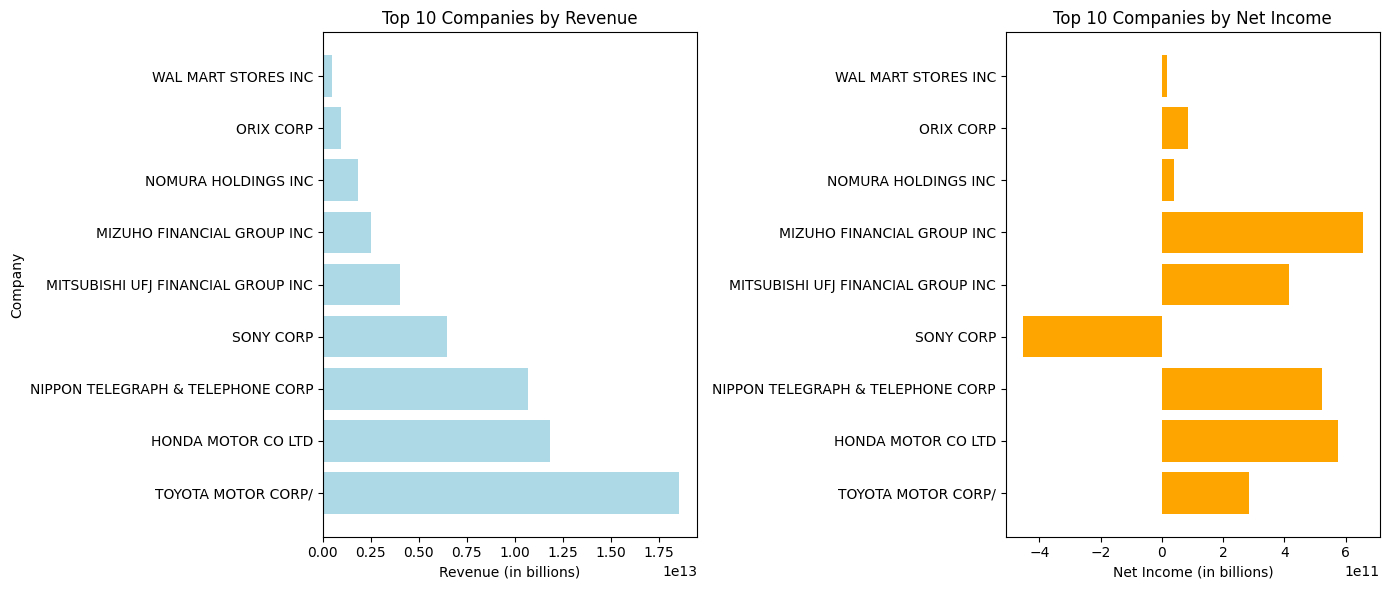

In [ ]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))


axes[0].barh(top_10_df['name'], top_10_df['Revenues'], color='lightblue')
axes[0].set_title('Top 10 Companies by Revenue')
axes[0].set_xlabel('Revenue (in billions)')
axes[0].set_ylabel('Company')

axes[1].barh(top_10_df['name'], top_10_df['NetIncomeLoss'], color='orange')
axes[1].set_title('Top 10 Companies by Net Income')
axes[1].set_xlabel('Net Income (in billions)')


plt.tight_layout()


plt.show()


#### Observations

#### Revenue Plot:
1. **Toyota Motor Corp** stands out as the company with the highest revenue, generating nearly 1.75 trillion (1.75e13) in revenue.
2. **Honda Motor Co Ltd** and **Nippon Telegraph & Telephone Corp** follow, with both companies generating over 1 trillion (1.0e13) in revenue.
3. **Sony Corp**, **Mitsubishi UFJ Financial Group Inc**, and **Mizuho Financial Group Inc** have comparable revenue in the range of 0.5 trillion (5.0e12) to 1 trillion (1.0e13).
4. **Wal-Mart Stores Inc** has significantly lower revenue compared to the other companies in this top 10 list, despite its large presence in the retail sector.
5. Companies like **Orix Corp**, **Nomura Holdings Inc**, and **Mizuho Financial Group Inc** generate relatively lower revenue compared to the industrial and automotive giants such as Toyota and Honda.

#### Net Income Plot:
1. **Mizuho Financial Group Inc** has the highest net income among the companies, indicating a strong profitability relative to others.
2. **Honda Motor Co Ltd** and **Nippon Telegraph & Telephone Corp** also report substantial net incomes, showing consistent performance with their high revenue generation.
3. **Sony Corp** shows a healthy net income, even though it generates less revenue compared to some other companies.
4. Interestingly, **Toyota Motor Corp**, despite having the highest revenue, has a much lower net income compared to companies like Mizuho Financial Group Inc. This suggests that Toyota's profitability is lower relative to its revenue.
5. **Wal-Mart Stores Inc** and **Orix Corp** show minimal net income compared to their revenue, indicating tight profit margins or high expenses.
6. **Nomura Holdings Inc** and **Wal-Mart Stores Inc** show very small net incomes, possibly indicating profitability issues despite their business scale.
7. **Mitsubishi UFJ Financial Group Inc** and **Sony Corp** both report healthy net incomes, balancing profitability with their revenue.

#### Additional Insight:
- The significant difference between revenue and net income for companies like **Toyota Motor Corp** and **Wal-Mart Stores Inc** highlights the fact that revenue alone doesn't guarantee high profitability. These companies may have high operational costs or other factors reducing their net income.
- Financial institutions such as **Mizuho Financial Group Inc** and **Mitsubishi UFJ Financial Group Inc** are reporting strong net incomes relative to their revenues, reflecting more efficient management of their financial operations compared to industrial companies.

These insights can help investors and analysts assess how efficiently companies are converting their revenue into profits, and they provide a clearer picture of financial health beyond revenue alone.

### **2**. Cluster companies based on financial health. Financial health is a function of revenue and debt, i.e. a health company will have high revenue and low debt.


In [ ]:

print(num_df.columns)


debt_tags = ['Debt', 'CurrentDebt', 'LongTermDebt']
debt_df = num_df[num_df['tag'].str.contains('|'.join(debt_tags), case=False, na=False)]


print(debt_df.head())


Index(['adsh', 'tag', 'version', 'coreg', 'ddate', 'qtrs', 'uom', 'value',
       'footnote'],
      dtype='object')
                       adsh                                               tag  \
26688  0000021510-14-000008  AvailableForSaleDebtSecuritiesAmortizedCostBasis   
26689  0000021510-14-000008  AvailableForSaleDebtSecuritiesAmortizedCostBasis   
26690  0000021175-14-000021  AvailableForSaleDebtSecuritiesAmortizedCostBasis   
26691  0000021175-14-000021  AvailableForSaleDebtSecuritiesAmortizedCostBasis   
26692  0000006951-14-000007  AvailableForSaleDebtSecuritiesAmortizedCostBasis   

            version          coreg     ddate  qtrs  uom        value footnote  
26688  us-gaap/2013           None  20130930     0  USD  139081000.0     None  
26689  us-gaap/2013           None  20131231     0  USD  134714000.0     None  
26690  us-gaap/2013  ParentCompany  20121231     0  USD    2000000.0     None  
26691  us-gaap/2013  ParentCompany  20131231     0  USD    1000000.0     Non

In [ ]:

debt_tags_extended = ['Debt', 'CurrentDebt', 'LongTermDebt', 'TotalDebt',
                      'Borrowings', 'Liabilities', 'Loans', 'Obligations']


extended_debt_df = num_df[num_df['tag'].str.contains('|'.join(debt_tags_extended), case=False, na=False)]


unique_debt_tags = extended_debt_df['tag'].unique()
print("Unique debt-related tags found:", unique_debt_tags)


print(extended_debt_df.head())

Unique debt-related tags found: ['AvailableForSaleDebtSecuritiesAmortizedCostBasis'
 'AvailableForSaleSecuritiesDebtSecurities' 'DerivativeLiabilities' ...
 'LongTermDebtAndCapitalLeaseObligationsIncludingCreditFacilitiesLessCapitalLeaseFutureInterestPayment'
 'ProductWarrantyAccrualReclassificationToLiabilitiesHeldForSale'
 'PaymentsForPremiumUponRedemptionOfDebt']
                       adsh                                               tag  \
26688  0000021510-14-000008  AvailableForSaleDebtSecuritiesAmortizedCostBasis   
26689  0000021510-14-000008  AvailableForSaleDebtSecuritiesAmortizedCostBasis   
26690  0000021175-14-000021  AvailableForSaleDebtSecuritiesAmortizedCostBasis   
26691  0000021175-14-000021  AvailableForSaleDebtSecuritiesAmortizedCostBasis   
26692  0000006951-14-000007  AvailableForSaleDebtSecuritiesAmortizedCostBasis   

            version          coreg     ddate  qtrs  uom        value footnote  
26688  us-gaap/2013           None  20130930     0  USD  1390810

In [ ]:

unique_tags = final_df['tag_x'].unique()
print("Unique tags in final_df['tag_x']:", unique_tags)

Unique tags in final_df['tag_x']: ['AccruedInvestmentIncomeReceivable'
 'AccumulatedOtherComprehensiveIncomeLossNetOfTax'
 'AdditionalPaidInCapitalCommonStock']


In [ ]:

revenue_tag = 'Revenues'
debt_tag = 'LongTermDebt'


revenue_df = final_df[final_df['tag_y'] == revenue_tag]
debt_df = final_df[final_df['tag_y'] == debt_tag]

revenue_df.head(5)
debt_df.head(5)

,adsh,tag_x,version_x,coreg,ddate,qtrs,uom,value,footnote,report,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
5541,0001193125-14-078864,AccruedInvestmentIncomeReceivable,us-gaap/2013,None,20121231,0,USD,715000000.0,None,2,...,20131231,2013.0,FY,20140303,2014-03-03 07:15:00.0,0,1,gnw-20131231.xml,1,None
5754,0001193125-14-078864,AccruedInvestmentIncomeReceivable,us-gaap/2013,None,20131231,0,USD,678000000.0,None,2,...,20131231,2013.0,FY,20140303,2014-03-03 07:15:00.0,0,1,gnw-20131231.xml,1,None
5967,0001193125-14-078864,AccruedInvestmentIncomeReceivable,us-gaap/2013,NonGuarantorSubsidiaries,20121231,0,USD,719000000.0,None,2,...,20131231,2013.0,FY,20140303,2014-03-03 07:15:00.0,0,1,gnw-20131231.xml,1,None
6180,0001193125-14-078864,AccruedInvestmentIncomeReceivable,us-gaap/2013,NonGuarantorSubsidiaries,20131231,0,USD,682000000.0,None,2,...,20131231,2013.0,FY,20140303,2014-03-03 07:15:00.0,0,1,gnw-20131231.xml,1,None
6393,0001193125-14-078864,AccruedInvestmentIncomeReceivable,us-gaap/2013,ConsolidationEliminations,20121231,0,USD,-4000000.0,None,2,...,20131231,2013.0,FY,20140303,2014-03-03 07:15:00.0,0,1,gnw-20131231.xml,1,None


In [ ]:

revenue_df = revenue_df[revenue_df['value'].notna() & (revenue_df['value'] > 0)]

scaler = StandardScaler()
revenue_df['value'] = scaler.fit_transform(revenue_df[['value']])


kmeans_revenue = KMeans(n_clusters=3, random_state=42)
revenue_df['cluster'] = kmeans_revenue.fit_predict(revenue_df[['value']])


print("Revenue DataFrame with Clusters:")
print(revenue_df[['adsh', 'value', 'cluster']].head())

Revenue DataFrame with Clusters:
                     adsh     value  cluster
68   0000004977-14-000052 -0.027719        0
276  0000004977-14-000052 -0.036249        0
488  0000005513-14-000008 -0.056296        0
672  0000005513-14-000008 -0.055211        0
848  0000011544-14-000012 -0.166296        0


<ipython-input-39-6d894888d6c3>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


revenue_df = revenue_df[revenue_df['value'].notna() & (revenue_df['value'] > 0)]


Q1 = revenue_df['value'].quantile(0.25)
Q3 = revenue_df['value'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


revenue_df = revenue_df[(revenue_df['value'] >= lower_bound) & (revenue_df['value'] <= upper_bound)]


scaler = StandardScaler()
revenue_df['value'] = scaler.fit_transform(revenue_df[['value']])


kmeans_revenue = KMeans(n_clusters=3, random_state=42)
revenue_df['cluster'] = kmeans_revenue.fit_predict(revenue_df[['value']])


print("Revenue DataFrame with Clusters after removing outliers:")
print(revenue_df[['adsh', 'value', 'cluster']].head())


Revenue DataFrame with Clusters after removing outliers:
                       adsh     value  cluster
3210   0000937834-14-000011  0.647643        2
3510   0000937834-14-000011  0.591845        2
5004   0001193125-14-073074  0.062943        2
5252   0001193125-14-073074  0.045125        2
11965  0000937834-14-000019 -0.352021        0


In [ ]:
import plotly.express as px

fig = px.scatter(revenue_df, x='name', y='value', color='cluster',
                 hover_data=['name'], title='Company Clusters Based on Revenues (After Removing Outliers)',
                 labels={'value':'Normalized Revenues', 'adsh':'Company ID'})


fig.show()


#### Explanation for the Revenues Plot:
The Revenue Clusters plot represents companies based on their normalized revenue values and the clusters they belong to:

x-axis: Represents the company names.
y-axis: Shows the normalized revenue values. This means that all revenue values have been scaled so that they fit within a common range, making it easier to compare different companies.
Color Coding (Clusters):
The colors indicate different clusters created by K-Means clustering. Each company is placed into one of the 3 clusters based on its revenue.
Cluster 0 (purple/blue): Represents companies that have similar revenue patterns or fall within the same range of revenue values.
Cluster 1 (yellow): Shows a slightly different cluster with companies grouped based on slightly higher revenues.
Cluster 2 (red): Shows another distinct group, possibly outliers with higher or significantly different revenue patterns compared to others.
Observations: Most companies appear to have very similar normalized revenue values (close to 0), indicating that they fall within a close range of revenue. A few companies show slightly distinct behavior and have been clustered separately.

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd


debt_tag = 'LongTermDebt'


debt_df = final_df[final_df['tag_y'] == debt_tag].copy()


debt_df = debt_df[debt_df['value'].notna() & (debt_df['value'] > 0)]


scaler = StandardScaler()
debt_df['value'] = scaler.fit_transform(debt_df[['value']])


kmeans_debt = KMeans(n_clusters=3, random_state=42)
debt_df['cluster'] = kmeans_debt.fit_predict(debt_df[['value']])

print("LongTermDebt DataFrame with Clusters:")
print(debt_df[['adsh', 'value', 'cluster']].head())

LongTermDebt DataFrame with Clusters:
                       adsh     value  cluster
5541   0001193125-14-078864 -0.039120        0
5754   0001193125-14-078864 -0.045477        0
5967   0001193125-14-078864 -0.038433        0
6180   0001193125-14-078864 -0.044790        0
13341  0000937834-14-000023 -0.063174        0


In [ ]:
#Removing Outliers
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

debt_tag = 'LongTermDebt'
debt_df = final_df[final_df['tag_y'] == debt_tag].copy()
debt_df = debt_df[debt_df['value'].notna() & (debt_df['value'] > 0)]

Q1 = debt_df['value'].quantile(0.25)
Q3 = debt_df['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

debt_df = debt_df[(debt_df['value'] >= lower_bound) & (debt_df['value'] <= upper_bound)]

scaler = StandardScaler()
debt_df['value'] = scaler.fit_transform(debt_df[['value']])

kmeans_debt = KMeans(n_clusters=3, random_state=42)
debt_df['cluster'] = kmeans_debt.fit_predict(debt_df[['value']])

print("LongTermDebt DataFrame with Clusters after removing outliers:")
print(debt_df[['adsh', 'value', 'cluster']].head())

LongTermDebt DataFrame with Clusters after removing outliers:
                       adsh     value  cluster
5541   0001193125-14-078864  1.631291        2
5754   0001193125-14-078864  1.514214        2
5967   0001193125-14-078864  1.643948        2
6180   0001193125-14-078864  1.526871        2
13341  0000937834-14-000023  1.188298        2


In [ ]:
# DebtCluster Visualization
import plotly.express as px

fig_debt = px.scatter(debt_df, x='name', y='value', color='cluster',
                      title='Company Clusters Based on Long-Term Debt',
                      labels={'value': 'Normalized Long-Term Debt', 'name': 'Company Name'})

fig_debt.show()

#### Explanation for the Long-Term Debt Plot:
The Long-Term Debt Clusters plot represents companies based on their normalized long-term debt values and their assigned clusters:

x-axis: Represents the company names.
y-axis: Shows the normalized long-term debt values, which are also scaled for comparison purposes.
Color Coding (Clusters):
Like the revenue plot, the colors represent the clusters created by K-Means clustering.
Cluster 0 (purple/blue): Represents companies with similar long-term debt values, which seem to be close to zero for many companies.
Cluster 1 (yellow): Shows companies with a slightly higher long-term debt.
Cluster 2 (red): Displays companies that have the highest long-term debt values, which makes them stand out in the clustering process.
Observations: Many companies have low or close-to-zero normalized long-term debt values. A few outliers, with much higher debt values, are grouped into separate clusters, particularly in Cluster 2.

### **3**.  Identify unusual reporting patterns or significant deviations from historical data, which may indicate potential fraud or misrepresentation.


In [ ]:
fraud_tag = 'RestatementAdjustmentMember'

fraud_df = final_df[final_df['tag_y'] == fraud_tag].copy()

fraud_df['flag'] = fraud_df['value'].notna().astype(int)

fraud_flagged_df = fraud_df.groupby('name')['flag'].sum().reset_index()

print("Fraud Analysis Table:")
print(fraud_flagged_df.head())

Fraud Analysis Table:
                                      name  flag
0           ADVANCED ENERGY INDUSTRIES INC     2
1  ALASKA COMMUNICATIONS SYSTEMS GROUP INC    10
2                     ASTEC INDUSTRIES INC     2
3                CINCINNATI FINANCIAL CORP    14
4                        CVS CAREMARK CORP     2


In [ ]:
fig = px.bar(fraud_flagged_df, x='name', y='flag', title='Companies with Restatement Flags',
             labels={'flag': 'Fraud Flags', 'name': 'Company Name'})

fig.update_layout(xaxis_tickangle=-45, height=600, width=1000)
fig.show()

#### Explanation of the Bar Plot - Companies with Restatement Flags

This bar plot illustrates the number of flagged instances (potential fraud or misrepresentation) for each company based on the `RestatementAdjustmentMember` tag. Each flag represents a non-null value for this tag, which may indicate an unusual reporting pattern or significant deviations from historical data that could signal potential fraud.

#### Key Observations:
1. **HERTZ GLOBAL HOLDINGS INC** shows the highest number of flagged instances, with nearly 20 counts. This could indicate a potential risk area where the company's financial restatements require closer scrutiny.
   
2. **METLIFE INSURANCE CO OF CONNECTICUT** and **ASTEC INDUSTRIES INC** also have notable counts of flagged instances. Both companies exhibit financial restatements that might warrant further investigation to ensure proper financial reporting practices.

3. **CVS CAREMARK CORP** and **NEWCASTLE INVESTMENT CORP** show a moderate number of flags, which suggests some degree of financial restatements, though they may not be as severe as the companies with higher counts.

4. Several companies, such as **CINCINNATI FINANCIAL CORP** and **ADVANCED ENERGY INDUSTRIES INC**, have lower but still non-zero flagged instances. These may indicate isolated restatements, but it’s still worth analyzing them further.

### **4**. Analyze how corporate executives and board members are connected across different companies and perform centrality analysis. Note that this dataset directly does not contain the names of office holders for a company. This data will need to be extracted from other sources such as Form 8-K or Form 10-K, or any third party data source.

In [ ]:
!pip install neo4j yfiles_jupyter_graphs_for_neo4j pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.6/296.6 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
# Count the occurrences of each unique value in the 'form' column
form_value_counts = sub_df['form'].value_counts()

print(form_value_counts)


form
10-Q        21215
10-K         6855
10-Q/A       1024
10-K/A        537
S-1/A         423
20-F          289
S-1           261
8-K           138
POS AM        113
6-K            92
S-4            49
10-KT          39
S-4/A          29
40-F           27
20-F/A         21
424B3          16
8-K/A          15
S-11/A         13
6-K/A          12
10-12G/A       12
10-QT           7
F-1/A           6
10-KT/A         5
S-11            4
10-12G          4
F-1             4
F-3/A           2
18-K            1
F-3ASR          1
40-F/A          1
424B4           1
DEFA14A         1
10-D            1
DEF 14A         1
Name: count, dtype: int64


In [ ]:
# Save the final DataFrame to CSV
final_df.to_csv('/content/drive/MyDrive/BDA_Project_2/final_neo4j_upload.csv', index=False)


In [ ]:
final_df.head(2)

,adsh,tag_x,version_x,coreg,ddate,qtrs,uom,value,footnote,report,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000004977-14-000052,AccruedInvestmentIncomeReceivable,us-gaap/2013,None,20121231,0,USD,842000000.0,None,4,...,20131231,2013.0,FY,20140227,2014-02-27 17:19:00.0,0,1,afl-20131231.xml,1,None
1,0000004977-14-000052,AccruedInvestmentIncomeReceivable,us-gaap/2013,None,20121231,0,USD,842000000.0,None,6,...,20131231,2013.0,FY,20140227,2014-02-27 17:19:00.0,0,1,afl-20131231.xml,1,None


In [ ]:
from neo4j import GraphDatabase

In [ ]:
driver = GraphDatabase.driver("neo4j+s://c35b4d75.databases.neo4j.io:7687", auth=("neo4j", "w_g6UxJsHrKUo1-uapGUVhguKG6Uy2HsMK0BltaJAVY"))

In [ ]:
import pandas as pd

# Load the CSV file
csv_file = '/content/drive/MyDrive/BDA_Project_2/final_neo4j_upload.csv'


df = pd.read_csv(csv_file, on_bad_lines='skip', quoting=0)

# Save the cleaned CSV to a new file
clean_csv_file = '/content/drive/MyDrive/BDA_Project_2/final_neo4j_upload_clean.csv'
df.to_csv(clean_csv_file, index=False)



<ipython-input-19-eff1f7ca0397>:7: DtypeWarning: Columns (3,8,24,31,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, on_bad_lines='skip', quoting=0)


In [ ]:
import pandas as pd

csv_file = '/content/drive/MyDrive/BDA_Project_2/final_neo4j_upload_clean.csv'

df = pd.read_csv(csv_file, low_memory=False)

filtered_df = df[df['form'] == '8-K'][['adsh', 'name', 'sic', 'form']]

filtered_df = filtered_df.drop_duplicates()

print(filtered_df.head(10))



                         adsh                          name     sic form
1195522  0001062993-14-000510  YOU ON DEMAND HOLDINGS, INC.  4841.0  8-K
1200239  0000230498-14-000043                  ROCK-TENN CO  2650.0  8-K


In [ ]:
import pandas as pd
from neo4j import GraphDatabase

csv_file = '/content/drive/MyDrive/BDA_Project_2/final_neo4j_upload_clean.csv'

df = pd.read_csv(csv_file, low_memory=False)

filtered_df = df[df['form'].isin(['8-K', '10-K'])][['adsh', 'name', 'sic', 'form']]

filtered_df = filtered_df.drop_duplicates()

print(filtered_df.head(20))

                       adsh                                 name     sic  form
0      0000004977-14-000052                            AFLAC INC  6321.0  10-K
416    0000005513-14-000008                           UNUM GROUP  6321.0  10-K
784    0000011544-14-000012                     BERKLEY W R CORP  6331.0  10-K
1126   0000015511-14-000004                      BNSF RAILWAY CO  4011.0  10-K
1430   0000020286-14-000009            CINCINNATI FINANCIAL CORP  6331.0  10-K
2170   0000021175-14-000021                   CNA FINANCIAL CORP  6331.0  10-K
2556   0000064996-14-000003                 MERCURY GENERAL CORP  6331.0  10-K
3120   0000937834-14-000011                          METLIFE INC  6311.0  10-K
4920   0001193125-14-073074             PRUDENTIAL FINANCIAL INC  6311.0  10-K
5416   0001193125-14-078864               GENWORTH FINANCIAL INC  6311.0  10-K
7546   0001193125-14-091656                       ING U.S., INC.  6311.0  10-K
11886  0000937834-14-000019       METROPOLITAN LIFE 

In [ ]:
from neo4j import GraphDatabase


def insert_data(tx, company_data):
    query = """
    UNWIND $company_data AS row
    MERGE (c:Company {adsh: row.adsh})  // Unique identifier (adsh)
    SET c.name = row.name,
        c.sic = row.sic,
        c.form = row.form
    RETURN c
    """
    tx.run(query, company_data=company_data)

def create_relationships(tx):
    query = """
    MATCH (c1:Company), (c2:Company)
    WHERE c1.sic = c2.sic AND c1 <> c2
    MERGE (c1)-[:IN_SAME_INDUSTRY]->(c2)
    RETURN c1, c2
    """
    tx.run(query)

# Connect to Neo4j
uri = "neo4j+s://c35b4d75.databases.neo4j.io:7687"  # Update with your Neo4j Aura connection string
driver = GraphDatabase.driver(uri, auth=("neo4j", "w_g6UxJsHrKUo1-uapGUVhguKG6Uy2HsMK0BltaJAVY"))  # Replace with your credentials


data = [
    {"adsh": "0000004977-14-000052", "name": "AFLAC INC", "sic": 6321.0, "form": "10-K"},
    {"adsh": "0000005513-14-000008", "name": "UNUM GROUP", "sic": 6321.0, "form": "10-K"},
    {"adsh": "0000011544-14-000012", "name": "BERKLEY W R CORP", "sic": 6331.0, "form": "10-K"},
    {"adsh": "0000015511-14-000004", "name": "BNSF RAILWAY CO", "sic": 4011.0, "form": "10-K"},
    {"adsh": "0000020286-14-000009", "name": "CINCINNATI FINANCIAL CORP", "sic": 6331.0, "form": "10-K"},
    {"adsh": "0000021175-14-000021", "name": "CNA FINANCIAL CORP", "sic": 6331.0, "form": "10-K"},
    {"adsh": "0000064996-14-000003", "name": "MERCURY GENERAL CORP", "sic": 6331.0, "form": "10-K"},
    {"adsh": "0000937834-14-000011", "name": "METLIFE INC", "sic": 6311.0, "form": "10-K"},
    {"adsh": "0001193125-14-073074", "name": "PRUDENTIAL FINANCIAL INC", "sic": 6311.0, "form": "10-K"},
    {"adsh": "0001193125-14-078864", "name": "GENWORTH FINANCIAL INC", "sic": 6311.0, "form": "10-K"}
]

with driver.session() as session:
    session.execute_write(insert_data, data)
    session.execute_write(create_relationships)

driver.close()



In [ ]:
from yfiles_jupyter_graphs_for_neo4j import Neo4jGraphWidget


g = Neo4jGraphWidget(driver)

def show_10k_graph(driver):
    query = """
    MATCH (n:Company {form: '10-K'})-[r]->(m:Company {form: '10-K'})
    RETURN n, r, m
    """
    g.show_cypher(query)

show_10k_graph(driver)


GraphWidget(layout=Layout(height='500px', width='100%'))

In [ ]:
from yfiles_jupyter_graphs_for_neo4j import Neo4jGraphWidget

g = Neo4jGraphWidget(driver)

def show_10k_graph(driver):
    query = """
    MATCH (n:Company {form: '10-K'})-[r]->(m:Company {form: '10-K'})
    RETURN n, r, m
    """
    g.show_cypher(query)

show_10k_graph(driver)


GraphWidget(layout=Layout(height='500px', width='100%'))

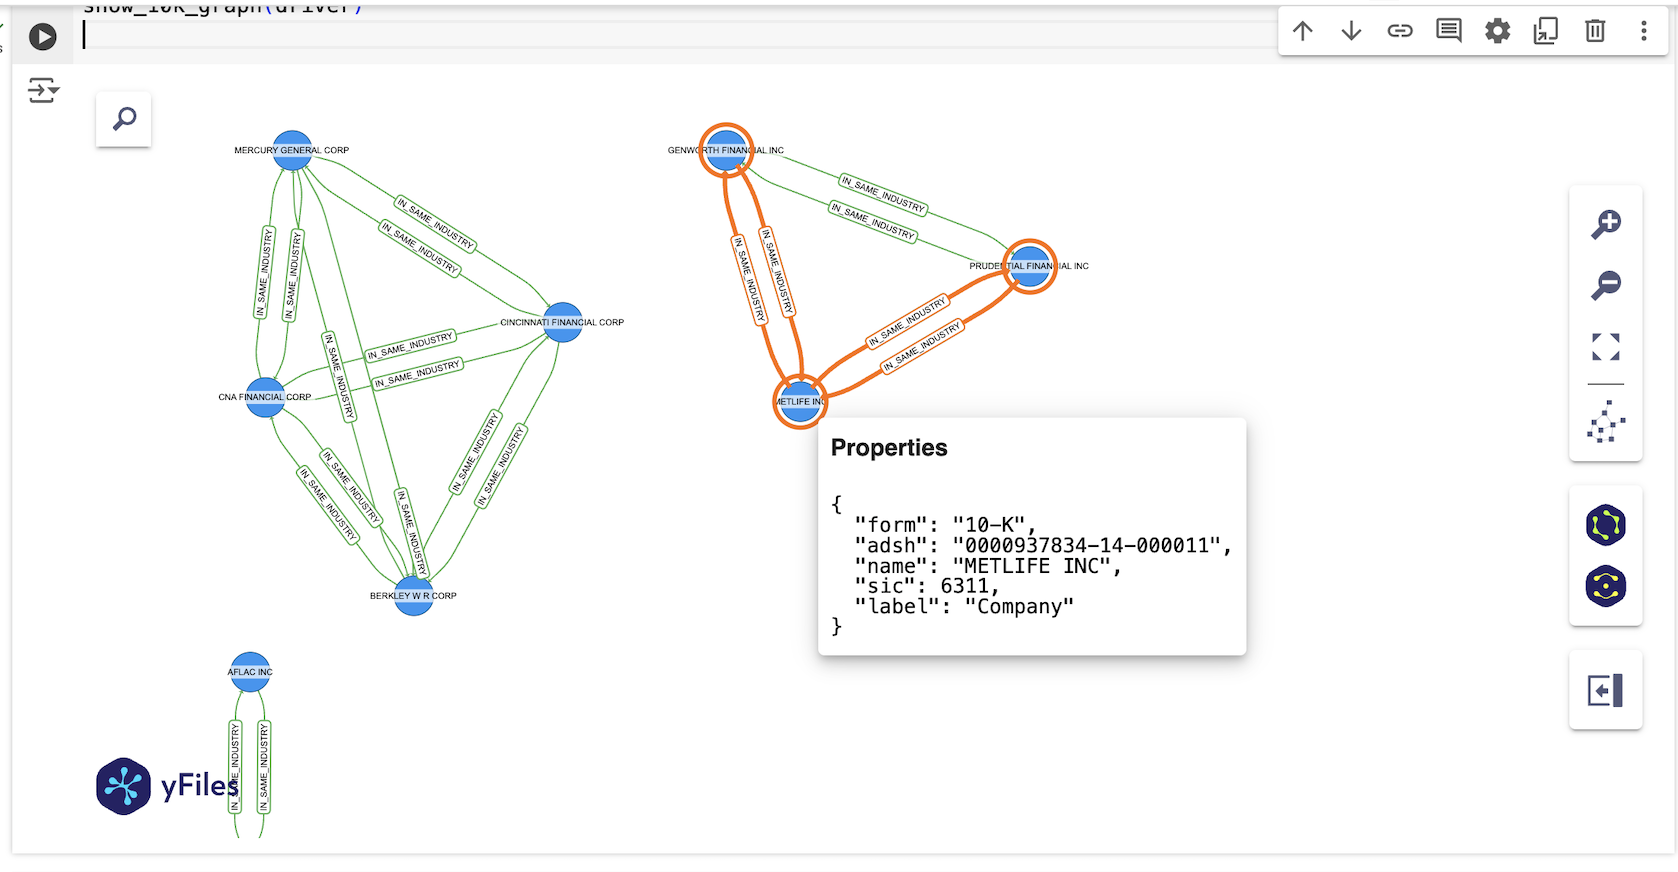

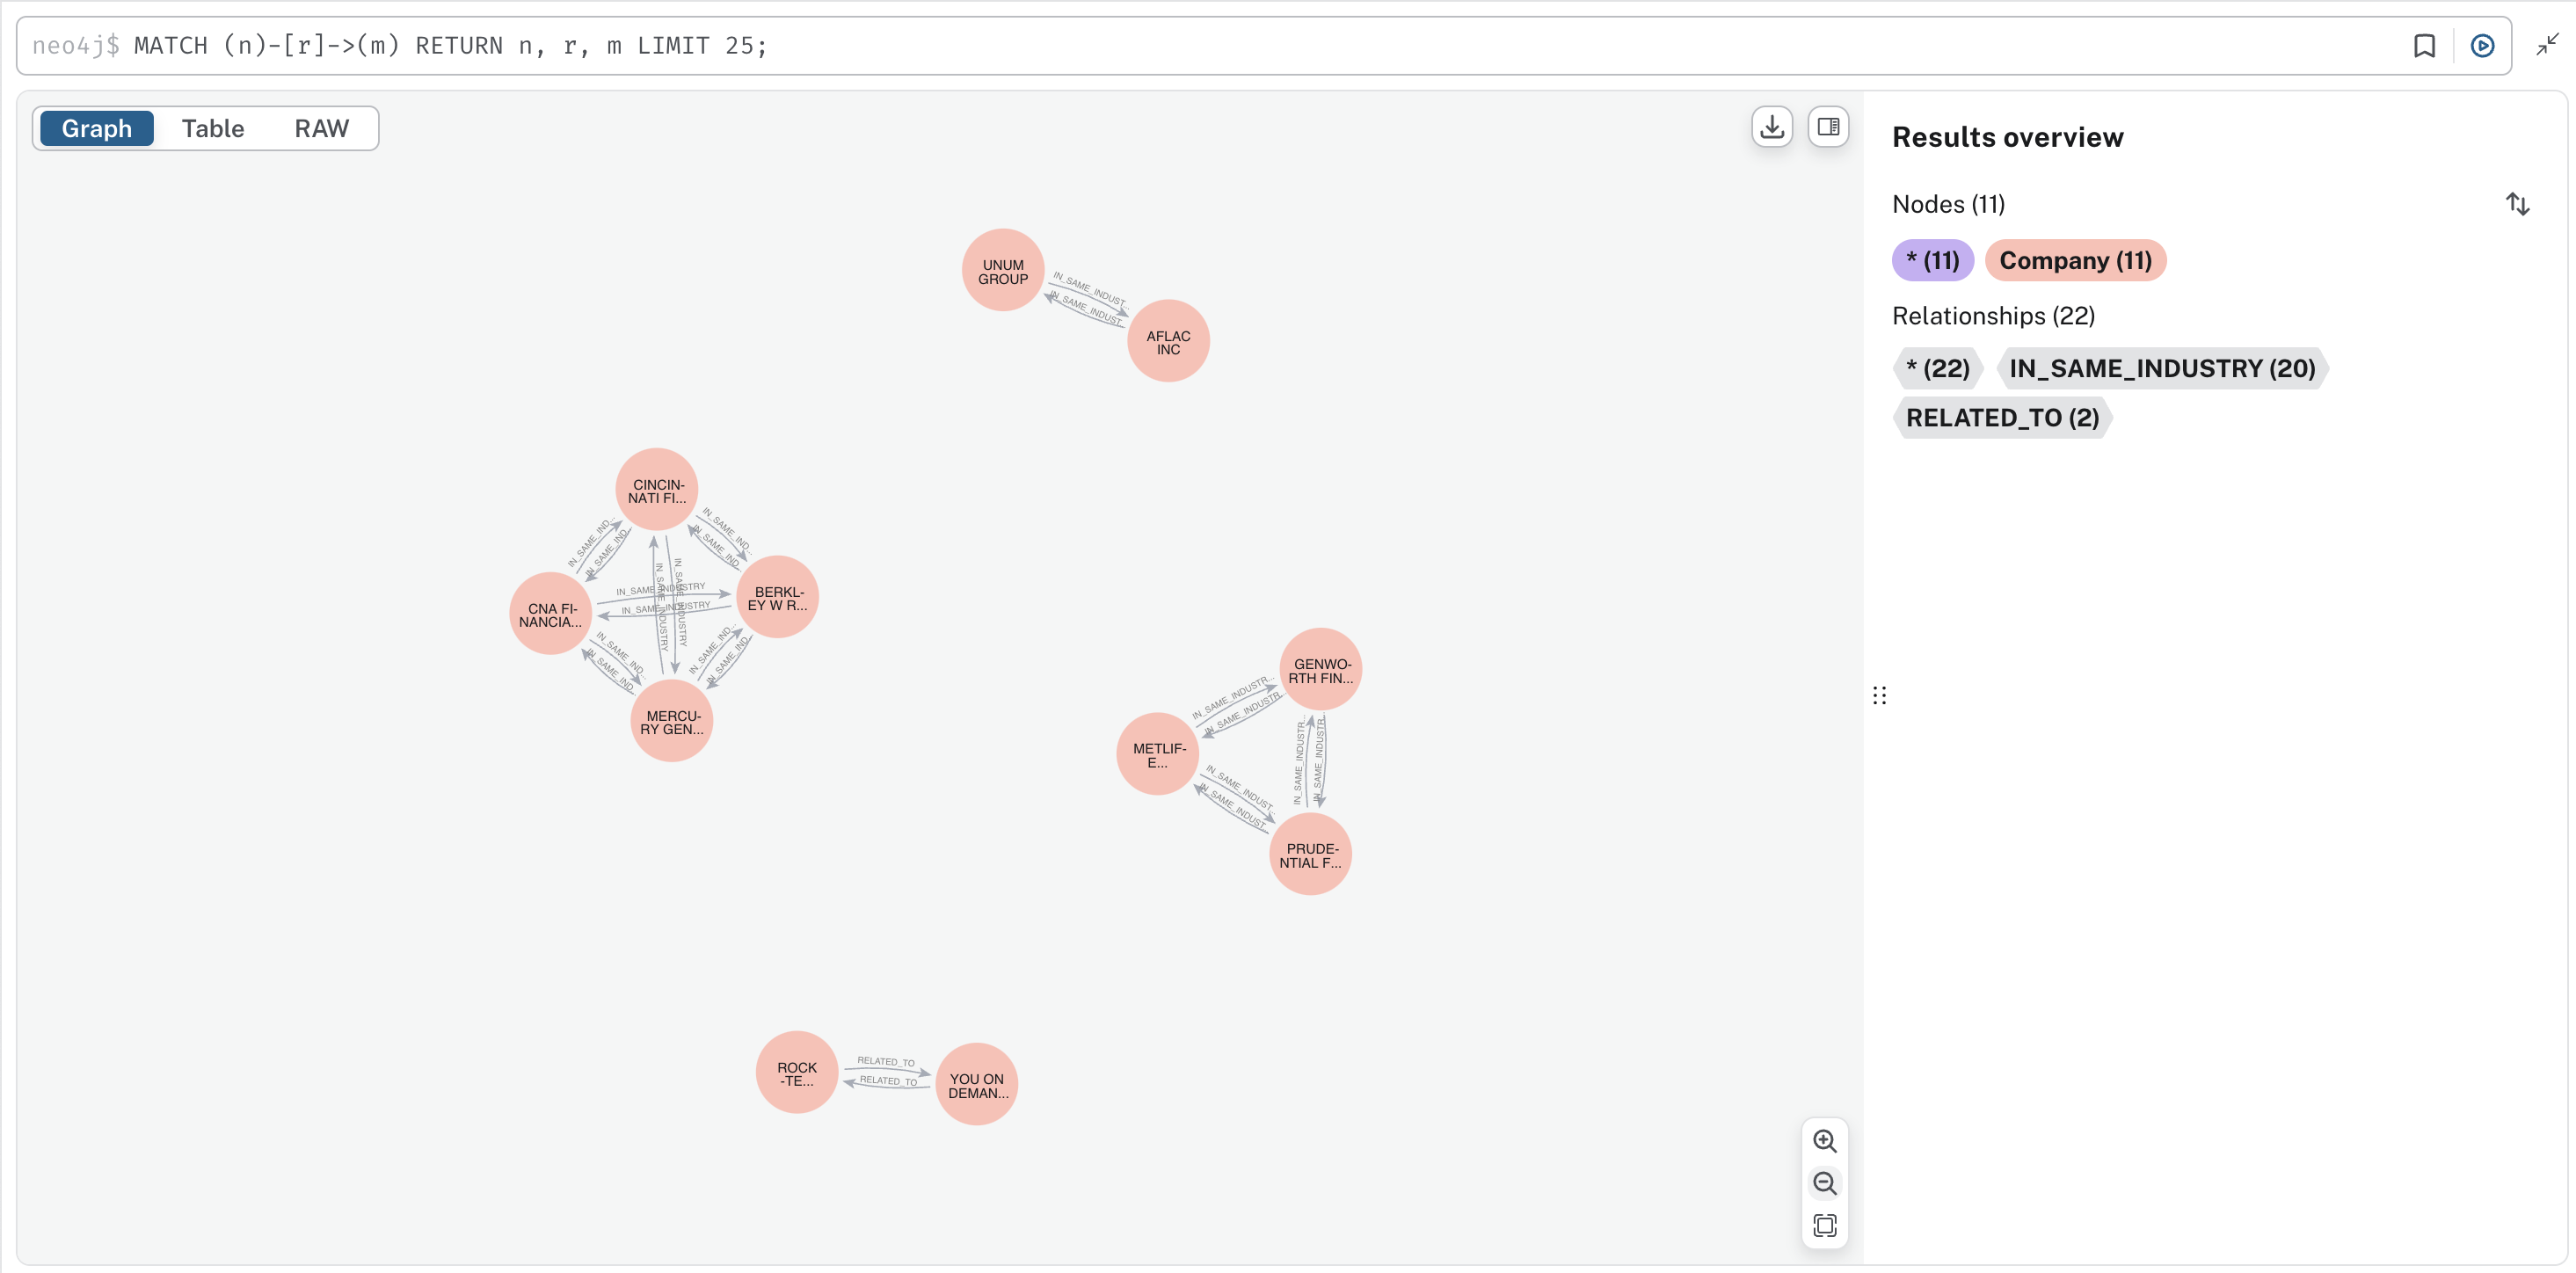

In [ ]:
import pandas as pd

def show_degree_centrality(driver):
    query = """
      MATCH (c:Company {form: '10-K'})  // Match only companies with form '10-K'
      OPTIONAL MATCH (c)--()  // Match all connections for each company
      RETURN c.name AS Company,
            COUNT(*) AS DegreeCentrality  // Use COUNT instead of size to calculate the degree centrality
      ORDER BY DegreeCentrality DESC  // Sort by degree centrality in descending order
    """
    with driver.session() as session:
        result = session.run(query)
        return [record.data() for record in result]


results = show_degree_centrality(driver)
pd.DataFrame(results)


<ipython-input-50-b937d342056a>:11: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


,Company,DegreeCentrality
0,BERKLEY W R CORP,6
1,CINCINNATI FINANCIAL CORP,6
2,CNA FINANCIAL CORP,6
3,MERCURY GENERAL CORP,6
4,METLIFE INC,4
5,PRUDENTIAL FINANCIAL INC,4
6,GENWORTH FINANCIAL INC,4
7,AFLAC INC,2
8,UNUM GROUP,2
9,BNSF RAILWAY CO,1


#### Explanation
The Degree Centrality metric in graph theory measures the number of direct connections a node has in a network. In the context of your output, each "Company" is a node, and the Degree Centrality reflects how many other companies it is directly connected to within the network.

Interpretation of the Output:
High Degree Centrality (6):Companies like BERKLEY W R CORP, CINCINNATI FINANCIAL CORP, CNA FINANCIAL CORP, and MERCURY GENERAL CORP have a degree centrality of 6, meaning they are highly connected to other companies in the network. These companies may serve as hubs or key players in the network, possibly indicating a strong influence or significant relationships with other companies.
These companies may play a central role in their industry, either through partnerships, financial dependencies, or common board members.

Moderate Degree Centrality (4):METLIFE INC, PRUDENTIAL FINANCIAL INC, and GENWORTH FINANCIAL INC have a degree centrality of 4. These companies are moderately connected to others in the network. While they are still important players, they might not have as wide a reach or influence as the companies with a degree centrality of 6.

Low Degree Centrality (2):AFLAC INC and UNUM GROUP have a degree centrality of 2. This suggests they are more peripheral in the network with fewer direct connections to other companies. They might have limited relationships or play a smaller role in the broader network.
Very Low Degree Centrality (1):

BNSF RAILWAY CO has a degree centrality of 1, indicating it has very limited connections with other companies in the network. It is likely isolated, with only one direct relationship. This could indicate a focus on a niche industry or fewer partnerships.


### **5**. Financial Query and Report Generation via GraphRAG. The user should be able to query specific financial metrics, trends, or insights from the dataset using plain English.

In [ ]:
import pandas as pd


csv_file = '/content/drive/MyDrive/BDA_Project_2/final_neo4j_upload_clean.csv'
df = pd.read_csv(csv_file)

unique_tags_x = df['tag_x'].unique()
unique_tags_y = df['tag_y'].unique()

print("Unique tag_x values:", unique_tags_x)
print("Unique tag_y values:", unique_tags_y)


<ipython-input-51-0a428a7b2b63>:5: DtypeWarning: Columns (3,8,24,31,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Unique tag_x values: ['AccruedInvestmentIncomeReceivable'
 'AccumulatedOtherComprehensiveIncomeLossNetOfTax'
 'AdditionalPaidInCapitalCommonStock']
Unique tag_y values: ['AccruedInvestmentIncomeReceivable'
 'AccumulatedOtherComprehensiveIncomeMember'
 'AdditionalPaidInCapitalCommonStock' ...
 'IssuanceOfCommonStockInPublicEquityOfferingsShares'
 'ReclassificationOfWarrantLiabilitiesToEquity'
 'SellingAndOperatingExpense']


In [ ]:
from neo4j import GraphDatabase


# Connect to Neo4j
uri = "neo4j+s://c35b4d75.databases.neo4j.io:7687"  # Replace with your Neo4j Aura connection string
driver = GraphDatabase.driver(uri, auth=("neo4j", "w_g6UxJsHrKUo1-uapGUVhguKG6Uy2HsMK0BltaJAVY"))


def insert_financial_data(tx, financial_data):
    query = """
    MERGE (c:Company {name: $name})  // Merge to avoid duplicates
    SET c.total_revenue = toFloat($total_revenue),  // Set total revenue
        c.total_net_income = toFloat($total_net_income),  // Set total net income
        c.profit_margin = toFloat($profit_margin)  // Set profit margin
    RETURN c;
    """
    tx.run(query, name=financial_data['name'],
           total_revenue=financial_data['Total_Revenue'],
           total_net_income=financial_data['Total_Net_Income'],
           profit_margin=financial_data['Profit_Margin'])


financial_data = {
    'name': 'HUNTINGTON BANCSHARES',
    'Total_Revenue': 1.8531,
    'Total_Net_Income': 8.9182395,
    'Profit_Margin': 48.12605633802817
}

with driver.session() as session:
    session.write_transaction(insert_financial_data, financial_data)

driver.close()


<ipython-input-60-3062e90d1099>:32: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(insert_financial_data, financial_data)


In [ ]:
def query_financial_data(driver, company_name):
    query = """
    MATCH (c:Company {name: $company_name})
    RETURN c.name AS Company, c.total_revenue AS Total_Revenue, c.total_net_income AS Total_Net_Income, c.profit_margin AS Profit_Margin;
    """
    with driver.session() as session:
        result = session.run(query, company_name=company_name)
        return [record.data() for record in result]

# Query the financial data for 'HUNTINGTON BANCSHARES'
financial_data = query_financial_data(driver, 'HUNTINGTON BANCSHARES')

print(financial_data)

driver.close()



[{'Company': 'HUNTINGTON BANCSHARES', 'Total_Revenue': 1.8531, 'Total_Net_Income': 8.9182395, 'Profit_Margin': 48.12605633802817}]


<ipython-input-63-b0cea6e169fd>:6: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


In [ ]:
from yfiles_jupyter_graphs_for_neo4j import Neo4jGraphWidget

g = Neo4jGraphWidget(driver)


def show_company_graph(driver, company_name):
    query = f"""
    MATCH (c:Company {{name: '{company_name}'}})
    RETURN c;
    """
    g.show_cypher(query)

show_company_graph(driver, 'HUNTINGTON BANCSHARES')



GraphWidget(layout=Layout(height='500px', width='100%'))

In [ ]:
import pandas as pd

base_path = '/content/drive/My Drive/BDA_Project_2/Parquet_Files/'

num_df = pd.read_parquet(base_path + 'NUM.parquet')
pre_df = pd.read_parquet(base_path + 'PRE.parquet')
sub_df = pd.read_parquet(base_path + 'SUB.parquet')

num_sample_df = num_df.head(10000)

num_pre_join = pd.merge(num_sample_df, pre_df, on='adsh', how='inner')
final_df = pd.merge(num_pre_join, sub_df, on='adsh', how='inner')

revenue_tag = 'Revenues'

revenue_df = final_df[final_df['tag_y'] == revenue_tag]

revenue_df = revenue_df.sort_values(by='value', ascending=False)

revenue_df['Formatted_Revenue'] = revenue_df['name'] + ' ' + (revenue_df['value'] / 1e9).astype(str) + 'bn'

print(revenue_df[['name', 'Formatted_Revenue']].head(10))
revenue_df


                                     name  \
1349324               JPMORGAN CHASE & CO   
1349577               JPMORGAN CHASE & CO   
1369197  AMERICAN INTERNATIONAL GROUP INC   
1368705  AMERICAN INTERNATIONAL GROUP INC   
1368951  AMERICAN INTERNATIONAL GROUP INC   
1368459  AMERICAN INTERNATIONAL GROUP INC   
829874             BERKSHIRE HATHAWAY INC   
1509022                 T-MOBILE US, INC.   
1530987            BERKSHIRE HATHAWAY INC   
1531183            BERKSHIRE HATHAWAY INC   

                                 Formatted_Revenue  
1349324               JPMORGAN CHASE & CO 94.604bn  
1349577               JPMORGAN CHASE & CO 93.828bn  
1369197  AMERICAN INTERNATIONAL GROUP INC 80.899bn  
1368705  AMERICAN INTERNATIONAL GROUP INC 80.899bn  
1368951   AMERICAN INTERNATIONAL GROUP INC 80.41bn  
1368459   AMERICAN INTERNATIONAL GROUP INC 80.41bn  
829874             BERKSHIRE HATHAWAY INC 44.025bn  
1509022                  T-MOBILE US, INC. 37.33bn  
1530987             BERKSHI

,adsh,tag_x,version_x,coreg,ddate,qtrs,uom,value,footnote,report,...,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks,Formatted_Revenue
1349324,0000019617-14-000289,AdditionalPaidInCapitalCommonStock,us-gaap/2013,None,20121231,0,USD,9.460400e+10,None,2,...,2013.0,FY,20140220,2014-02-19 20:02:00.0,0,1,jpm-20131231.xml,1,None,JPMORGAN CHASE & CO 94.604bn
1349577,0000019617-14-000289,AdditionalPaidInCapitalCommonStock,us-gaap/2013,None,20131231,0,USD,9.382800e+10,None,2,...,2013.0,FY,20140220,2014-02-19 20:02:00.0,0,1,jpm-20131231.xml,1,None,JPMORGAN CHASE & CO 93.828bn
1369197,0001047469-14-001096,AdditionalPaidInCapitalCommonStock,us-gaap/2013,ParentCompany,20131231,0,USD,8.089900e+10,None,5,...,2013.0,FY,20140220,2014-02-20 16:11:00.0,0,1,aig-20131231.xml,1,None,AMERICAN INTERNATIONAL GROUP INC 80.899bn
1368705,0001047469-14-001096,AdditionalPaidInCapitalCommonStock,us-gaap/2013,None,20131231,0,USD,8.089900e+10,None,5,...,2013.0,FY,20140220,2014-02-20 16:11:00.0,0,1,aig-20131231.xml,1,None,AMERICAN INTERNATIONAL GROUP INC 80.899bn
1368951,0001047469-14-001096,AdditionalPaidInCapitalCommonStock,us-gaap/2013,ParentCompany,20121231,0,USD,8.041000e+10,None,5,...,2013.0,FY,20140220,2014-02-20 16:11:00.0,0,1,aig-20131231.xml,1,None,AMERICAN INTERNATIONAL GROUP INC 80.41bn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058672,0001193125-14-075712,AccumulatedOtherComprehensiveIncomeLossNetOfTax,us-gaap/2013,SubsidiaryIssuer,20121231,0,USD,NaN,None,4,...,2013.0,FY,20140228,2014-02-28 11:50:00.0,0,1,rhp-20131231.xml,1,None,"RYMAN HOSPITALITY PROPERTIES, INC. nanbn"
1058857,0001193125-14-075712,AccumulatedOtherComprehensiveIncomeLossNetOfTax,us-gaap/2013,SubsidiaryIssuer,20131231,0,USD,NaN,None,4,...,2013.0,FY,20140228,2014-02-28 11:50:00.0,0,1,rhp-20131231.xml,1,None,"RYMAN HOSPITALITY PROPERTIES, INC. nanbn"
1573620,0001010412-14-000019,AdditionalPaidInCapitalCommonStock,us-gaap/2013,None,20130331,0,USD,NaN,None,4,...,2013.0,Q3,20140214,2014-02-14 16:35:00.0,0,1,sund-20131231.xml,1,None,"SUNDANCE STRATEGIES, INC. nanbn"
1629720,0001493152-14-000316,AdditionalPaidInCapitalCommonStock,us-gaap/2013,None,20120331,0,USD,NaN,None,4,...,2013.0,Q2,20140203,2014-01-31 20:37:00.0,1,1,owmc-20130930.xml,1,None,OWLHEAD MINERALS CORP. nanbn


In [ ]:
from neo4j import GraphDatabase

# Connect to Neo4j
uri = "neo4j+s://c35b4d75.databases.neo4j.io:7687"  # Replace with your Neo4j Aura connection string
driver = GraphDatabase.driver(uri, auth=("neo4j", "w_g6UxJsHrKUo1-uapGUVhguKG6Uy2HsMK0BltaJAVY"))

def insert_financial_data(tx, name, total_revenue):
    query = """
    MERGE (c:Company {name: $name})  // Merge to avoid duplicates
    SET c.total_revenue = toFloat($total_revenue)  // Set total revenue
    RETURN c;
    """
    tx.run(query, name=name, total_revenue=total_revenue)


financial_data = [
    {'name': 'JPMORGAN CHASE & CO', 'Total_Revenue': 94.604},
    {'name': 'JPMORGAN CHASE & CO', 'Total_Revenue': 93.828},
    {'name': 'AMERICAN INTERNATIONAL GROUP INC', 'Total_Revenue': 80.899},
    {'name': 'AMERICAN INTERNATIONAL GROUP INC', 'Total_Revenue': 80.41},
    {'name': 'BERKSHIRE HATHAWAY INC', 'Total_Revenue': 44.025},
    {'name': 'T-MOBILE US, INC.', 'Total_Revenue': 37.33},
    {'name': 'BERKSHIRE HATHAWAY INC', 'Total_Revenue': 37.23},
    {'name': 'BERKSHIRE HATHAWAY INC', 'Total_Revenue': 35.472}
]


with driver.session() as session:
    for data in financial_data:
        session.write_transaction(insert_financial_data, data['name'], data['Total_Revenue'])


driver.close()


<ipython-input-76-6e1401322452>:31: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(insert_financial_data, data['name'], data['Total_Revenue'])


#### Different companies Total Revenue

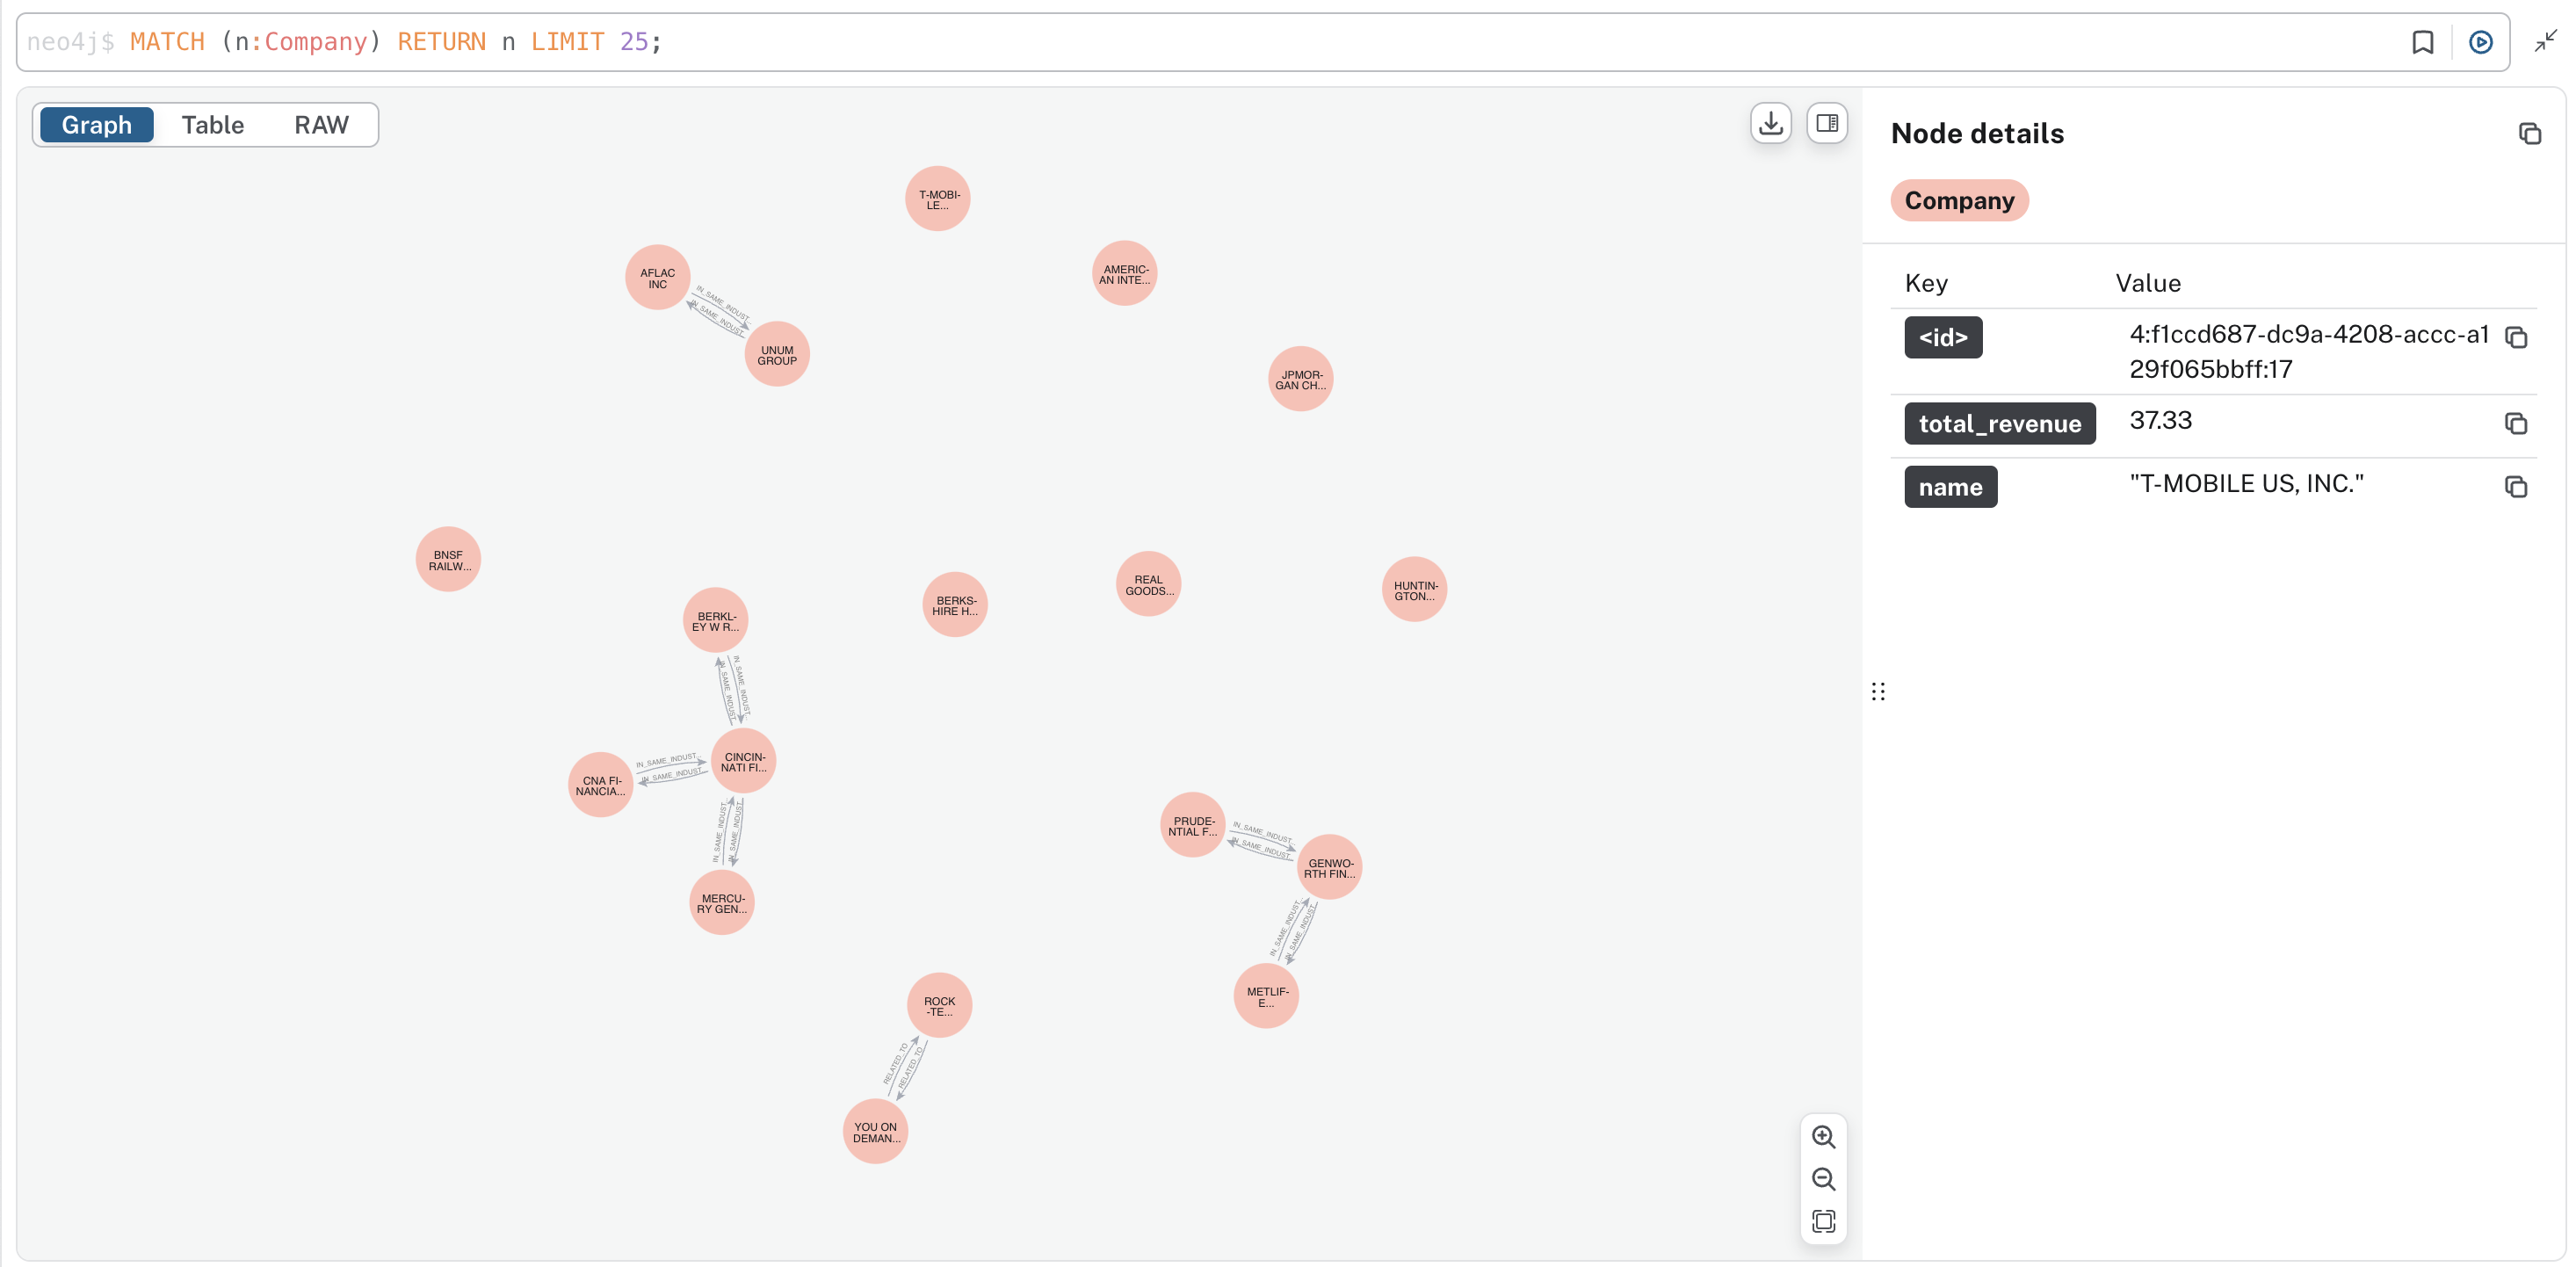

#### Huntington Banchshares Total Revenue

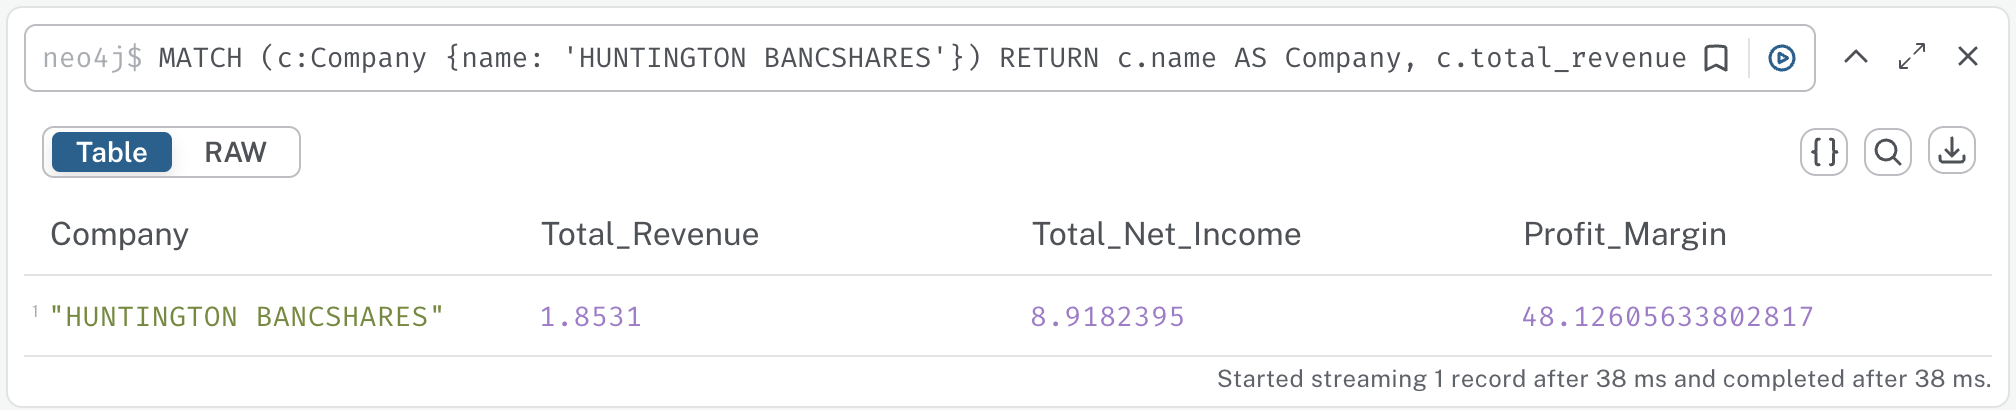

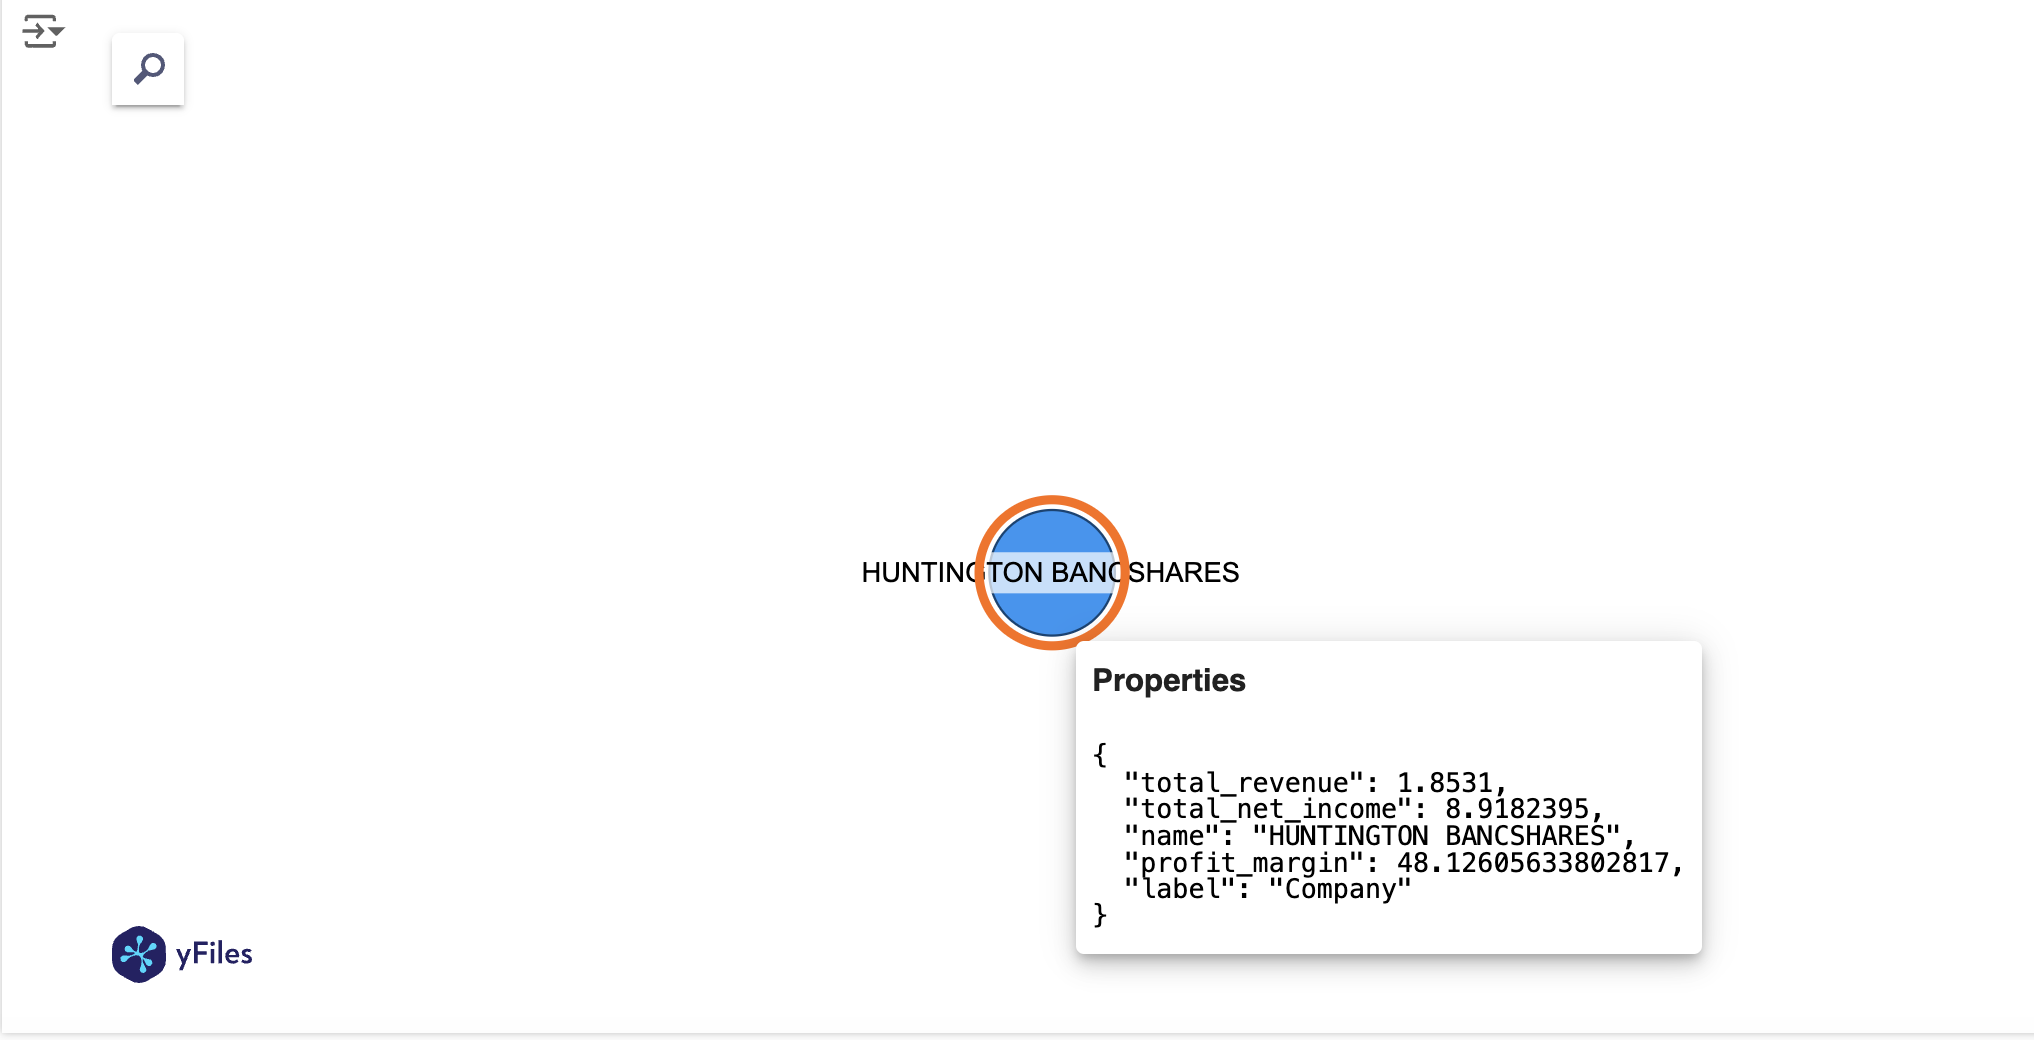

#### Explanation

Financial Dominance: JPMorgan Chase & Co and American International Group Inc (AIG) dominate the list with consistently high revenues above 80bn. This highlights the strength and scale of these financial institutions in generating significant revenues year over year.

Diversified Holdings: Berkshire Hathaway Inc has multiple entries with varying revenue figures. This reflects the diversified nature of its business, which includes ownership across various industries. The revenue fluctuation indicates that different subsidiaries or business segments may perform differently depending on the time period.

Telecom Presence: T-Mobile US, Inc., while not on the same revenue level as the financial giants, still shows substantial revenue, highlighting its prominence in the telecom sector.

Summary:
The top companies in this list, particularly JPMorgan Chase & Co, American International Group Inc, and Berkshire Hathaway Inc, are major players with large revenues, mainly driven by financial services. T-Mobile US, Inc. stands out as a telecom leader, indicating a strong presence in a different industry. The repeated entries for each company likely represent different reporting periods or multiple segments of the companies being analyzed, but overall, they reveal the companies' revenue-generating power.
